In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bouts_out_new.csv")
df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [25]:
df.columns

Index(['edad_a', 'edad_b', 'altura_a', 'altura_b', 'alcance_mano_a',
       'alcance_mano_b', 'posicion_a', 'posicion_b', 'peso_a', 'peso_b',
       'ganadas_a', 'ganadas_b', 'perdidas_a', 'perdidas_b', 'empatadas_a',
       'empatadas_b', 'kos_a', 'kos_b', 'resultado', 'decision', 'juez1_a',
       'juez1_b', 'juez2_a', 'juez2_b', 'juez3_a', 'juez3_b'],
      dtype='object')

In [4]:
rename_columns = {
    'age_A': 'edad_a', 'age_B': 'edad_b', 'height_A': 'altura_a', 
    'height_B': 'altura_b', 'reach_A': 'alcance_mano_a',
    'reach_B': 'alcance_mano_b', 'stance_A': 'posicion_a', 'stance_B': 'posicion_b',
    'weight_A': 'peso_a', 'weight_B': 'peso_b', 'won_A': 'ganadas_a', 'won_B': 'ganadas_b',
       'lost_A': 'perdidas_a', 'lost_B': 'perdidas_b', 'drawn_A': 'empatadas_a', 'drawn_B':'empatadas_b',
    'kos_A': 'kos_a', 'kos_B': 'kos_b', 'result': 'resultado', 'decision': 'decision',
    'judge1_A': 'juez1_a', 'judge1_B': 'juez1_b', 'judge2_A': 'juez2_a', 'judge2_B': 'juez2_b', 
    'judge3_A': 'juez3_a', 'judge3_B': 'juez3_b'
}
df.rename(columns=rename_columns, inplace=True)

In [35]:
df.head(100)

,edad_a,edad_b,altura_a,altura_b,alcance_mano_a,alcance_mano_b,posicion_a,posicion_b,peso_a,peso_b,...,kos_b,resultado,decision,juez1_a,juez1_b,juez2_a,juez2_b,juez3_a,juez3_b,diff_perdidas_a_b
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0,-1
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0,-1
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0,-2
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0,-3
5,24.0,31.0,175.0,175.0,179.0,178.0,orthodox,orthodox,NaN,NaN,...,28.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN,0
6,23.0,31.0,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,155.0,...,12.0,win_A,SD,115.0,113.0,117.0,111.0,113.0,115.0,0
7,23.0,31.0,175.0,177.0,179.0,175.0,orthodox,orthodox,155.0,NaN,...,18.0,win_A,TKO,89.0,82.0,88.0,83.0,89.0,82.0,-2
8,36.0,23.0,173.0,175.0,183.0,179.0,orthodox,orthodox,152.0,NaN,...,30.0,win_A,MD,116.0,112.0,114.0,114.0,117.0,111.0,0
9,27.0,22.0,177.0,175.0,183.0,179.0,southpaw,southpaw,NaN,NaN,...,30.0,win_B,UD,112.0,115.0,109.0,118.0,111.0,116.0,0


In [13]:
df.isnull().sum()

edad_a             34539
edad_b            129492
altura_a          138181
altura_b          252787
alcance_mano_a    275085
alcance_mano_b    349554
posicion_a        156418
posicion_b        156418
peso_a            251854
peso_b            257069
ganadas_a              0
ganadas_b              0
perdidas_a             0
perdidas_a             0
empatadas_a            0
empatadas_b            0
kos_a                  0
kos_b                 79
resultado              0
decision               0
juez1_a           335179
juez1_b           335367
juez2_a           317056
juez2_b           317395
juez3_a           326196
juez3_b           326404
dtype: int64

In [17]:
fig, axes = plt.subplots(nrows=1, ncols= df.perdidas_a.nunique(), figsize=(16,6))

for c, i in zip(np.sort(df.perdidas_a.unique()), range(3)):
    df[df.perdidas_a == 1].ganadas_a.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[i])
    axes[i].set_title(c)

TypeError: 'Series' object cannot be interpreted as an integer

<Figure size 1152x432 with 0 Axes>

In [26]:
df['diff_perdidas_a_b'] = df.perdidas_a - df.perdidas_b

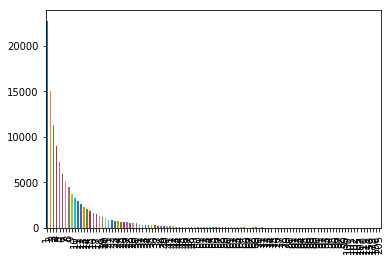

In [27]:
df[df.diff_perdidas_a_b>0].diff_perdidas_a_b.value_counts().sort_index().plot.bar()

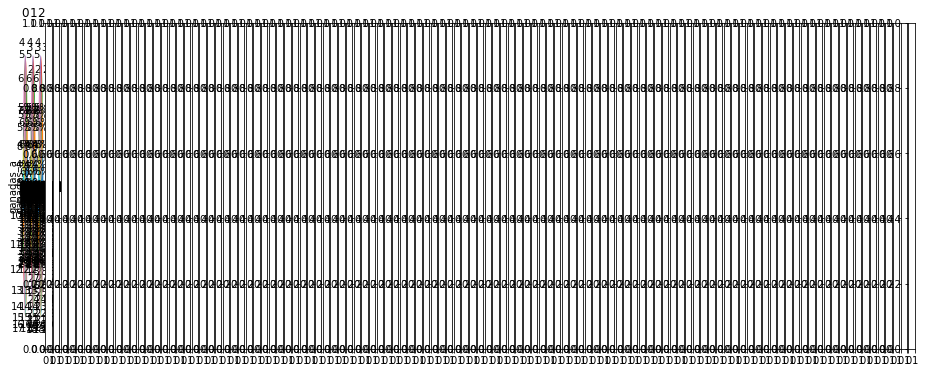

In [30]:
fig, axes = plt.subplots(nrows=1, ncols= df.perdidas_a.nunique(), figsize=(16,6))

for c, i in zip(np.sort(df.perdidas_a.unique()), range(3)):
    df[df.perdidas_a == 1].ganadas_a.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[i])
    axes[i].set_title(c)

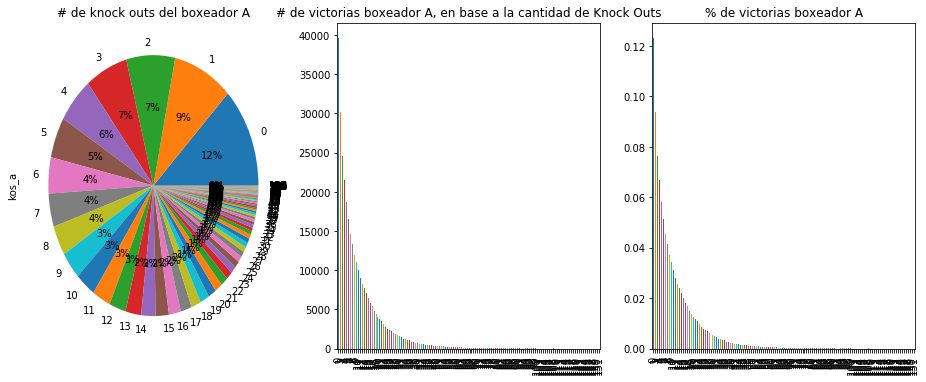

In [11]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de knock outs del boxeador A')
df.kos_a.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[0])
ax[1].set_title('# de victorias boxeador A, en base a la cantidad de Knock Outs')
df[df.resultado == 'win_A'].kos_a.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de victorias boxeador A')
df[df.resultado == 'win_A'].kos_a.value_counts(normalize = True).sort_index().plot.bar(ax=ax[2])